<a href="https://colab.research.google.com/github/aritradey-CS/Admission-Prediction/blob/master/Another_copy_of_Nov_23_Update.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import csv
import random

# Function to read an existing CSV file and return its data as a list of dictionaries
def read_existing_csv(file_name):
    data = []
    with open(file_name, mode='r') as file:
        reader = csv.DictReader(file)
        for row in reader:
            data.append(row)
    return data

# Function to generate additional data or entries
def generate_new_entries(existing_data, num_entries_to_add):
    new_data = []
    for i in range(num_entries_to_add):
        # You can create your own logic to generate new entries here.
        # For this example, we'll simply copy existing entries.
        new_entry = existing_data[i % len(existing_data)].copy()
        new_entry['Serial No.'] = str(len(existing_data) + i + 1)  # Updating the Serial No. for the new entry
        new_data.append(new_entry)
    return new_data

# Function to write the combined data to a new CSV file
def write_combined_data(file_name, combined_data):
    with open(file_name, mode='w', newline='') as file:
        fieldnames = combined_data[0].keys()
        writer = csv.DictWriter(file, fieldnames=fieldnames)
        writer.writeheader()
        writer.writerows(combined_data)

if __name__ == "__main__":
    existing_csv_file = "Admission_Predict.csv"
    new_csv_file = "new_data.csv"
    num_entries_to_add = 2000

    # Step 1: Read the existing CSV file
    existing_data = read_existing_csv(existing_csv_file)

    # Step 2: Generate new entries
    new_entries = generate_new_entries(existing_data, num_entries_to_add)

    # Step 3: Combine the existing and new data
    combined_data = existing_data + new_entries

    # Step 4: Write the combined data to a new CSV file
    write_combined_data(new_csv_file, combined_data)

    print(f"{num_entries_to_add} new entries have been added to {new_csv_file}.")

2000 new entries have been added to new_data.csv.


                   GRE Score  TOEFL Score  University Rating       SOP  \
GRE Score           1.000000     0.835977           0.668976  0.612831   
TOEFL Score         0.835977     1.000000           0.695590  0.657981   
University Rating   0.668976     0.695590           1.000000  0.734523   
SOP                 0.612831     0.657981           0.734523  1.000000   
LOR                 0.557555     0.567721           0.660123  0.729593   
CGPA                0.833060     0.828417           0.746479  0.718144   
Research            0.580391     0.489858           0.447783  0.444029   
Chance of Admit     0.802610     0.791594           0.711250  0.675732   

                       LOR       CGPA  Research  Chance of Admit   
GRE Score          0.557555  0.833060  0.580391          0.802610  
TOEFL Score        0.567721  0.828417  0.489858          0.791594  
University Rating  0.660123  0.746479  0.447783          0.711250  
SOP                0.729593  0.718144  0.444029          0.67

<Axes: >

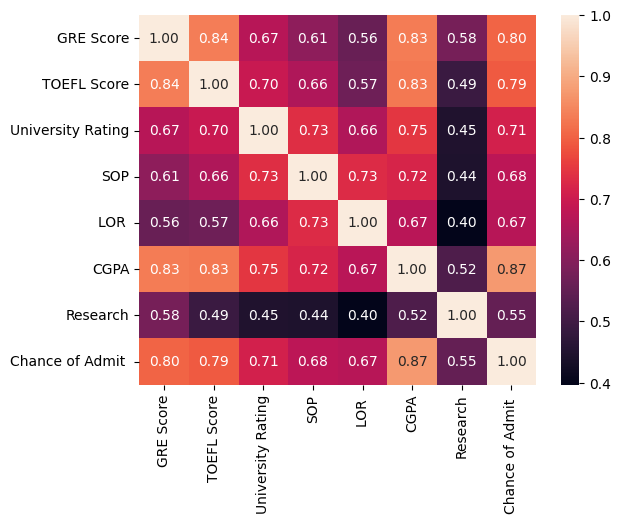

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np

# Load the dataset from the CSV file
df = pd.read_csv('new_data.csv')
df.head(10)

# Assigning the list of columns from the dataset
numericColumns = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research', 'Chance of Admit ']

# Creating a correlation matrix
correlationMatrix = df.loc[:, numericColumns].corr()

# Printing the correlation matrix
print(correlationMatrix)

# Displaying the correlation matrix with two decimal places
sns.heatmap(correlationMatrix, annot=True, fmt='.2f')  # Use fmt='.2f' to display two decimal places


1.  Loads a dataset from a CSV file named  
    'custom_data_correlated.csv' using Pandas.

2.  Defines a list of numeric column names to work with.

3.  Calculates a correlation matrix for the specified
    numeric columns. The correlation matrix shows how each numeric column is related to every other numeric column in the dataset.

4.  Prints the correlation matrix to the console, showing
    the pairwise correlations between the columns.

5.  Displays the correlation matrix as a heatmap using
    Seaborn. The sns.heatmap function is used to create the heatmap, and the annot=True parameter adds the correlation values to each cell of the heatmap. The fmt='.2f' parameter is used to format the values to display two decimal places in the heatmap.

In summary, this code loads a dataset, calculates and prints the correlation matrix, and then visualizes the correlation matrix as a heatmap with correlation values rounded to two decimal places. This can be helpful for understanding the relationships between the features in the dataset.

The provided code loads a dataset from a CSV file and performs the following tasks:

1. It categorizes the "University Rating" feature into five categories (U5, U4, U3, U2, U1) based on specified cutoff values.
2. It counts the number of data points in each category.
3. It creates a bar plot to visualize the distribution of data across these University Rating categories.
4. It prints the count of students in each of the five categories.

This code is used to explore and visualize how the data is distributed among different University Rating categories.

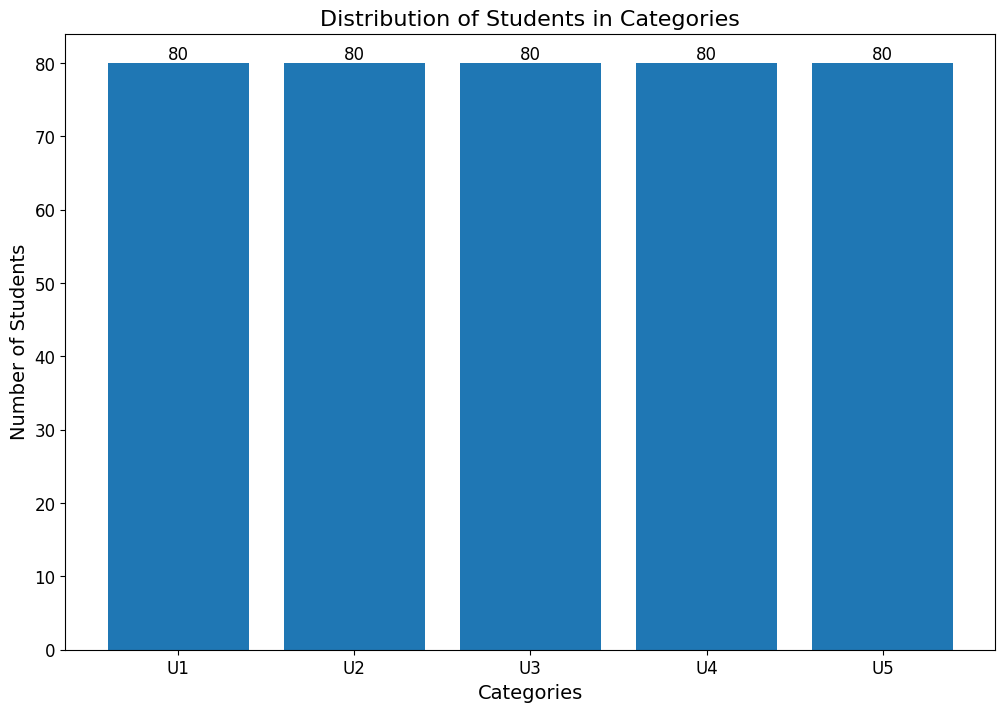

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load student data from the CSV file (adjust the file path as needed)
file_path = 'Admission_Predict.csv'
df = pd.read_csv(file_path)

# Sort the data by a relevant feature (e.g., University Rating)
df = df.sort_values(by='University Rating')

# Calculate the number of students in each category
category_size = 80

# Initialize an empty dictionary to store the categories
categories = {}

# Split the data into five equal-sized categories
for i in range(5):
    start_index = i * category_size
    end_index = (i + 1) * category_size
    category_name = f'U{i + 1}'
    category_data = df.iloc[start_index:end_index]
    categories[category_name] = category_data

# Visualize the distribution of students in each category
category_counts = [len(categories[category_name]) for category_name in categories]

# Create a bar plot with increased text size
plt.figure(figsize=(12, 8))
bar_plot = plt.bar(categories.keys(), category_counts)
plt.title('Distribution of Students in Categories', fontsize=16)
plt.xlabel('Categories', fontsize=14)
plt.ylabel('Number of Students', fontsize=14)

# Increase the font size for x-axis and y-axis labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Increase the font size for bar labels
for bar in bar_plot:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom', fontsize=12)

plt.show()

# Now, 'categories' is a dictionary where each key represents a category (U1, U2, U3, U4, U5),
# and the corresponding value is a DataFrame containing 480 students from that category.


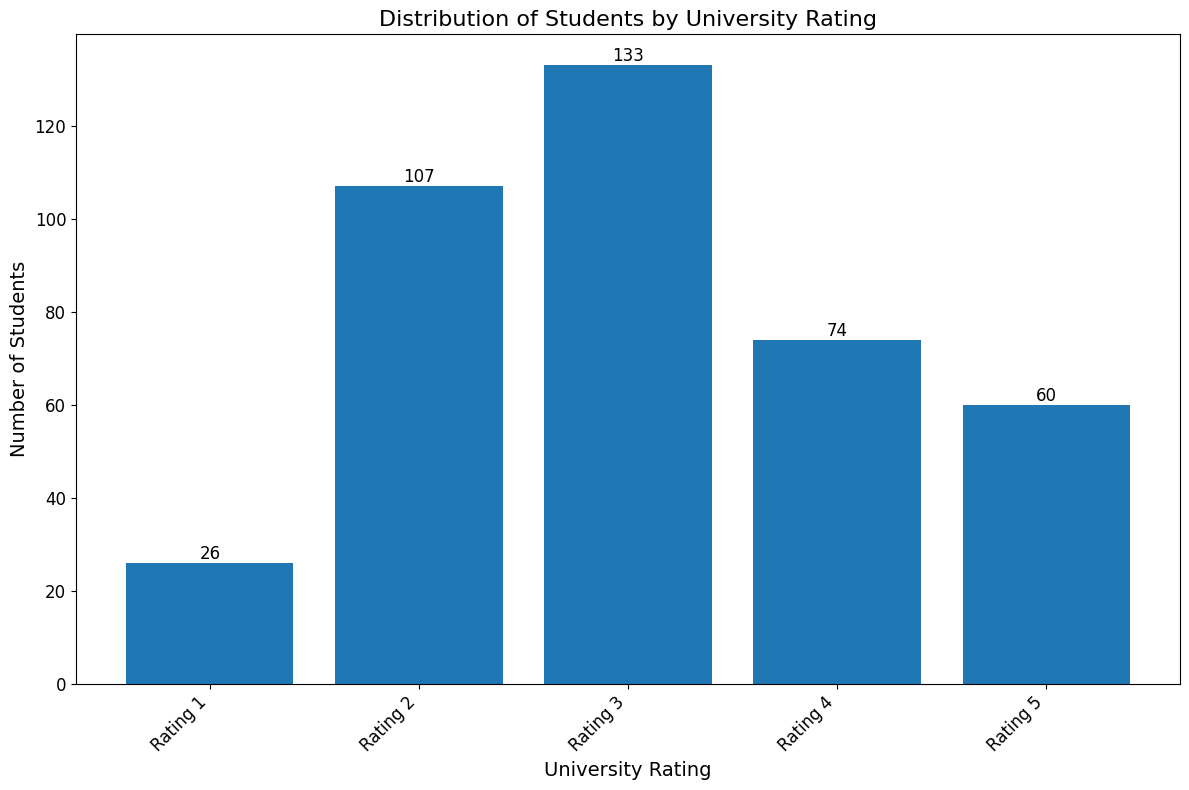

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load student data from the CSV file (adjust the file path as needed)
file_path = 'Admission_Predict.csv'
df = pd.read_csv(file_path)

# Sort the data by 'University Rating'
df = df.sort_values(by='University Rating')

# Get unique university ratings
unique_ratings = df['University Rating'].unique()

# Initialize empty variables to store each category
rating_1 = None
rating_2 = None
rating_3 = None
rating_4 = None
rating_5 = None

# Create categories based on unique university ratings
for rating in unique_ratings:
    category_data = df[df['University Rating'] == rating]
    if rating == 1:
        rating_1 = category_data
    elif rating == 2:
        rating_2 = category_data
    elif rating == 3:
        rating_3 = category_data
    elif rating == 4:
        rating_4 = category_data
    elif rating == 5:
        rating_5 = category_data

# Visualize the distribution of students in each category
category_counts = [len(category_data) for category_data in [rating_1, rating_2, rating_3, rating_4, rating_5]]

# Create a bar plot
plt.figure(figsize=(12, 8))
bar_plot = plt.bar([f'Rating {i}' for i in range(1, 6)], category_counts)
plt.title('Distribution of Students by University Rating', fontsize=16)
plt.xlabel('University Rating', fontsize=14)
plt.ylabel('Number of Students', fontsize=14)

# Increase the font size for x-axis and y-axis labels
plt.xticks(fontsize=12, rotation=45, ha='right')
plt.yticks(fontsize=12)

# Add text labels on top of each bar
for bar in bar_plot:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

# Now, each rating data is stored in separate variables: rating_1, rating_2, rating_3, rating_4, and rating_5.
# These variables can be reused for further analysis.


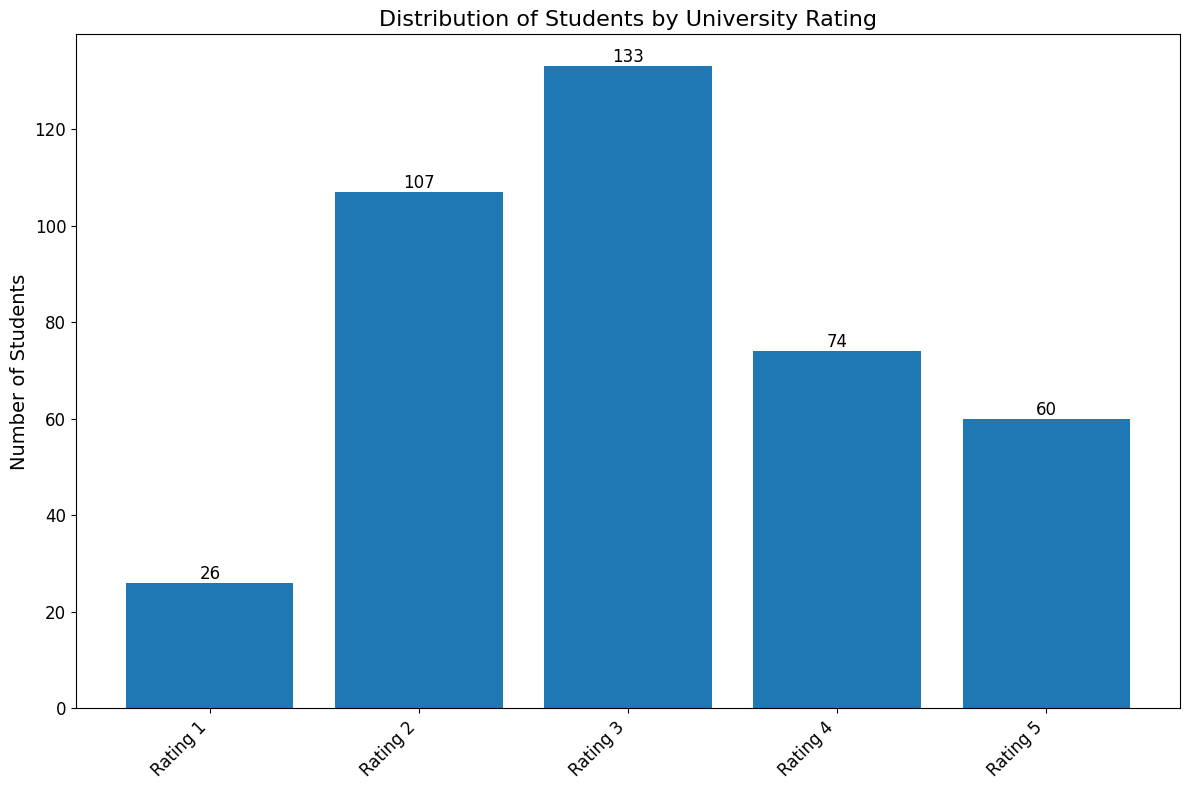

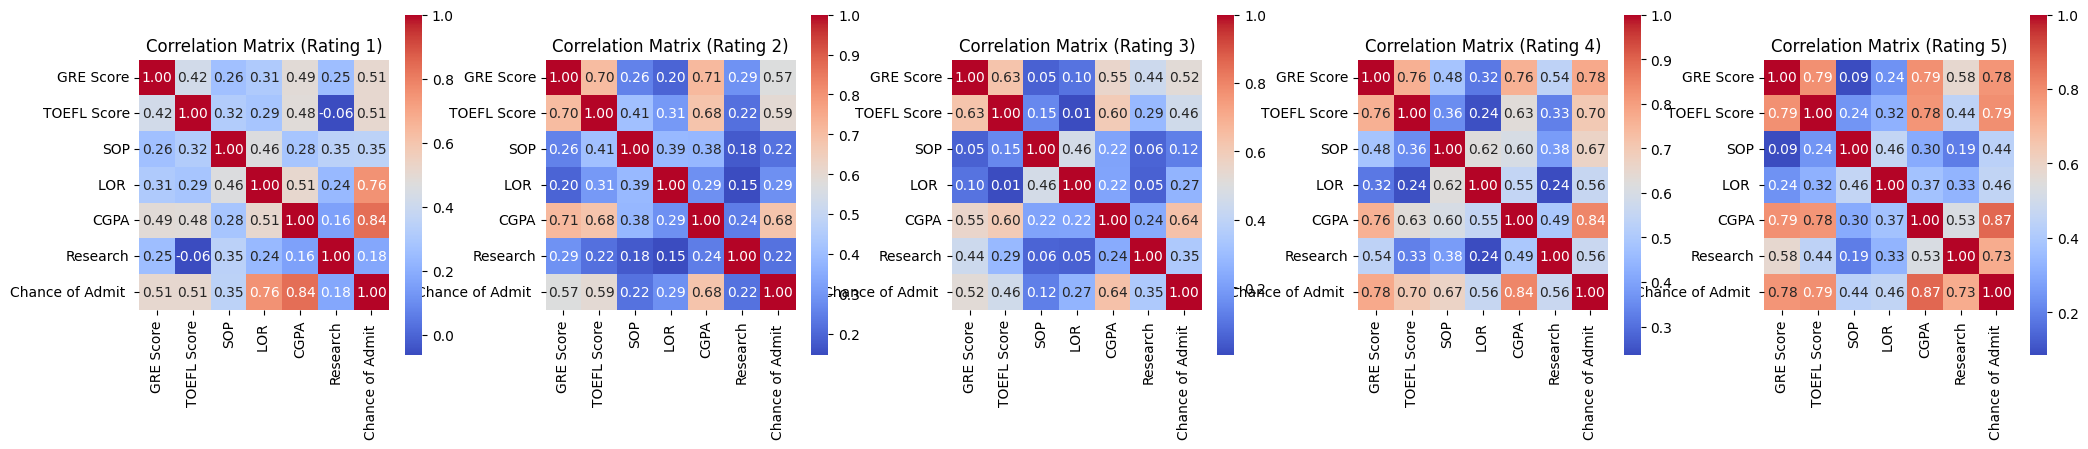

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load student data from the CSV file (adjust the file path as needed)
file_path = 'Admission_Predict.csv'
df = pd.read_csv(file_path)



# Initialize empty variables to store each category
rating_1 = None
rating_2 = None
rating_3 = None
rating_4 = None
rating_5 = None

# Create categories based on unique university ratings
for rating in range(1, 6):
    category_data = df[df['University Rating'] == rating]
    if rating == 1:
        rating_1 = category_data
    elif rating == 2:
        rating_2 = category_data
    elif rating == 3:
        rating_3 = category_data
    elif rating == 4:
        rating_4 = category_data
    elif rating == 5:
        rating_5 = category_data

# Visualize the distribution of students in each category
category_counts = [len(category_data) for category_data in [rating_1, rating_2, rating_3, rating_4, rating_5]]

# Create a bar plot
plt.figure(figsize=(12, 8))
bar_plot = plt.bar([f'Rating {i}' for i in range(1, 6)], category_counts)
plt.title('Distribution of Students by University Rating', fontsize=16)
# plt.xlabel('University Rating', fontsize=14)
plt.ylabel('Number of Students', fontsize=14)

# Increase the font size for x-axis and y-axis labels
plt.xticks(fontsize=12, rotation=45, ha='right')
plt.yticks(fontsize=12)

# Add text labels on top of each bar
for bar in bar_plot:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

# Calculate and visualize correlation matrices for each rating category
rating_categories = {'Rating 1': rating_1, 'Rating 2': rating_2, 'Rating 3': rating_3, 'Rating 4': rating_4, 'Rating 5': rating_5}

# Initialize a dictionary to store correlation matrices
correlation_matrices = {}

# Iterate through each rating category
for rating, data in rating_categories.items():
    # Dropping 'Serial No.' and 'University Rating' columns from data
    data = data.drop(columns=['Serial No.', 'University Rating'])
    # Calculate the correlation matrix
    correlation_matrix = data.corr()
    # Store the correlation matrix
    correlation_matrices[rating] = correlation_matrix

# Plot correlation matrices
fig, axes = plt.subplots(1, 5, figsize=(25, 5))
fig.subplots_adjust(wspace=0.3, bottom=0.2)  # Adjust spacing between plots

for i, (rating, corr_matrix) in enumerate(correlation_matrices.items()):
    sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', ax=axes[i], square=True)
    axes[i].set_title(f'Correlation Matrix ({rating})')

plt.show()

# Now, you can use correlation_matrices['Rating 1'], correlation_matrices['Rating 2'], ..., correlation_matrices['Rating 5'] in your next part of the code


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Load student data from the CSV file (adjust the file path as needed)
file_path = 'Admission_Predict.csv'
df = pd.read_csv(file_path)

# Initialize empty variables to store each category
rating_1 = None
rating_2 = None
rating_3 = None
rating_4 = None
rating_5 = None

# Create categories based on unique university ratings
for rating in range(1, 6):
    category_data = df[df['University Rating'] == rating]
    if rating == 1:
        rating_1 = category_data
    elif rating == 2:
        rating_2 = category_data
    elif rating == 3:
        rating_3 = category_data
    elif rating == 4:
        rating_4 = category_data
    elif rating == 5:
        rating_5 = category_data

# Calculate mean values and covariance matrices for each rating category
mean_values = {}
covariance_matrices = {}

for rating, data in {'Rating 1': rating_1, 'Rating 2': rating_2, 'Rating 3': rating_3, 'Rating 4': rating_4, 'Rating 5': rating_5}.items():
    mean_values[rating] = data.mean().values[1:]  # Exclude 'Serial No.' and 'University Rating'
    covariance_matrices[rating] = data.drop(columns=['Serial No.', 'University Rating']).cov().values

# Generate random samples for each rating category
num_samples = 400

rng = np.random.default_rng()

rating_samples = {}

for rating, mu in mean_values.items():
    r = covariance_matrices[rating]
    y = rng.multivariate_normal(mu, r, size=num_samples)
    rating_samples[rating] = y

# Plot the distribution of students by university rating
category_counts = [len(category_data) for category_data in [rating_1, rating_2, rating_3, rating_4, rating_5]]

plt.figure(figsize=(12, 8))
bar_plot = plt.bar([f'Rating {i}' for i in range(1, 6)], category_counts)
plt.title('Distribution of Students by University Rating', fontsize=16)
plt.ylabel('Number of Students', fontsize=14)
plt.xticks(fontsize=12, rotation=45, ha='right')
plt.yticks(fontsize=12)

for bar in bar_plot:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

# Calculate and visualize correlation matrices for each rating category
rating_categories = {'Rating 1': rating_1, 'Rating 2': rating_2, 'Rating 3': rating_3, 'Rating 4': rating_4, 'Rating 5': rating_5}

correlation_matrices = {}

for rating, data in rating_categories.items():
    data = data.drop(columns=['Serial No.', 'University Rating'])
    correlation_matrix = data.corr()
    correlation_matrices[rating] = correlation_matrix

# Plot correlation matrices
fig, axes = plt.subplots(1, 5, figsize=(25, 5))
fig.subplots_adjust(wspace=0.3, bottom=0.2)

for i, (rating, corr_matrix) in enumerate(correlation_matrices.items()):
    sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', ax=axes[i], square=True)
    axes[i].set_title(f'Correlation Matrix ({rating})')

plt.show()


ValueError: mean and cov must have same length

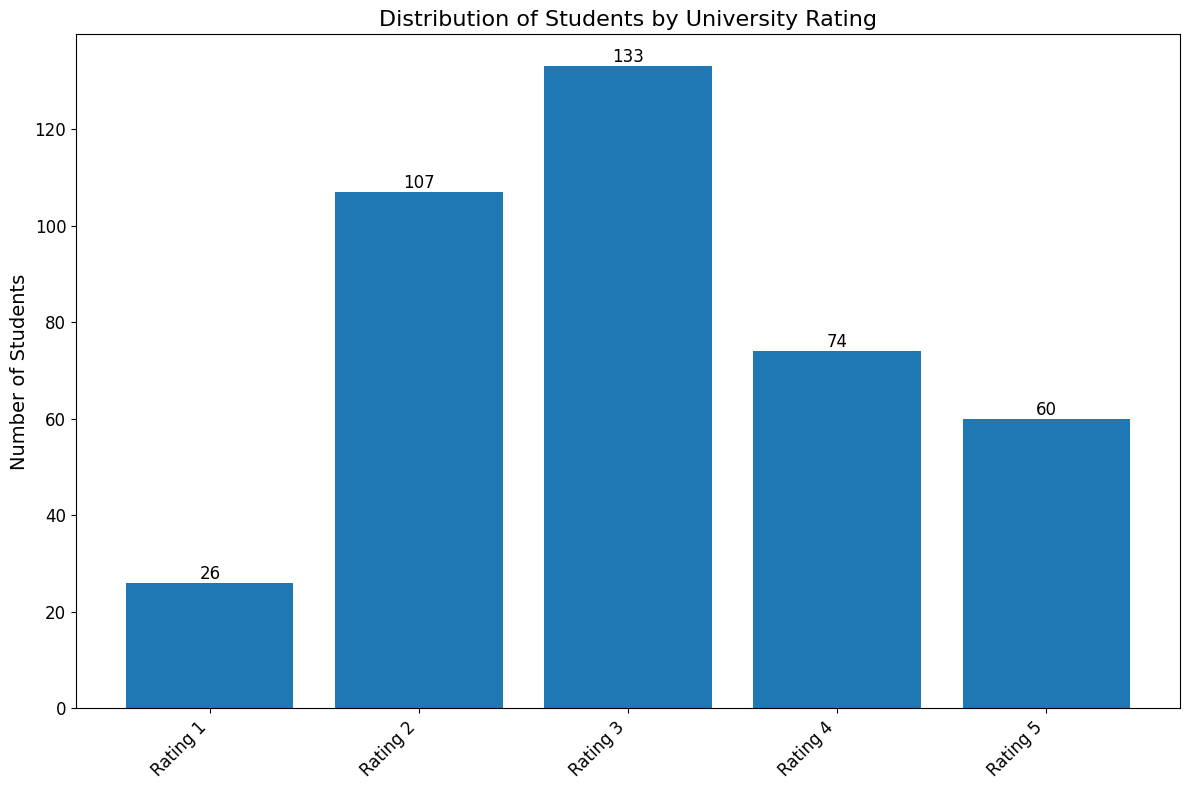

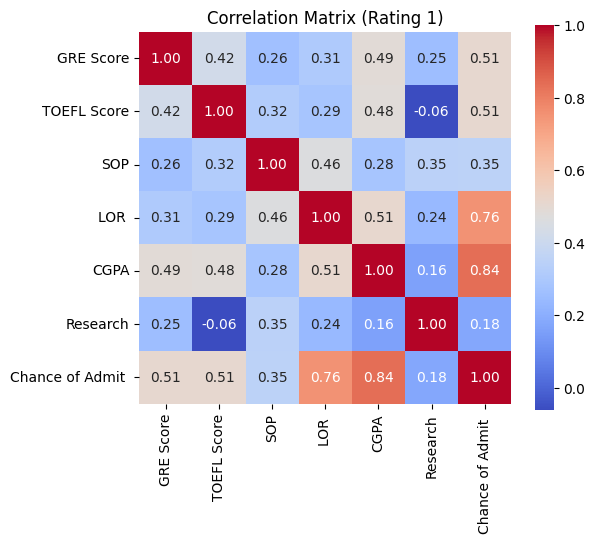

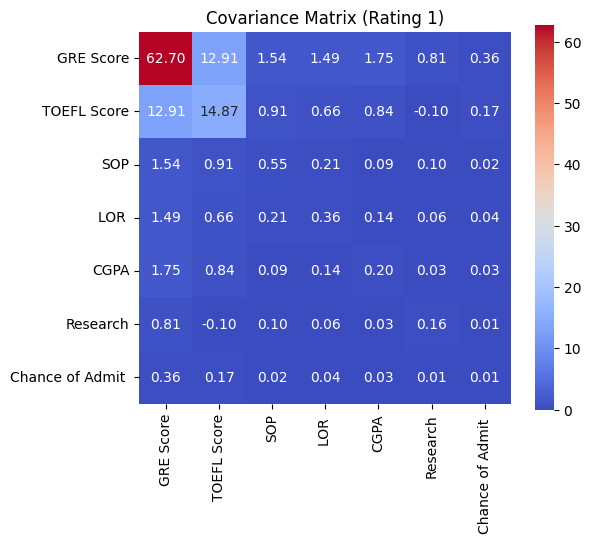

Mean of Rating 1:
GRE Score           303.156654
TOEFL Score          99.080139
SOP                   1.883877
LOR                   2.211547
CGPA                  7.746410
Research              0.191953
Chance of Admit       0.548242
dtype: float64
Covariance of Rating 1:
                  GRE Score  TOEFL Score       SOP          LOR       CGPA  \
GRE Score          0.050936     0.000473  0.000218  1.018545e-04  0.000058   
TOEFL Score        0.000473     0.012149  0.000040  5.759358e-05 -0.000123   
SOP                0.000218     0.000040  0.000482 -2.997802e-05  0.000037   
LOR                0.000102     0.000058 -0.000030  3.218694e-04 -0.000016   
CGPA               0.000058    -0.000123  0.000037 -1.561510e-05  0.000179   
Research          -0.000110    -0.000093 -0.000008 -4.123769e-07  0.000016   
Chance of Admit   -0.000020     0.000027 -0.000005 -3.067463e-06  0.000001   

                      Research  Chance of Admit   
GRE Score        -1.098318e-04     -1.971288e-05  

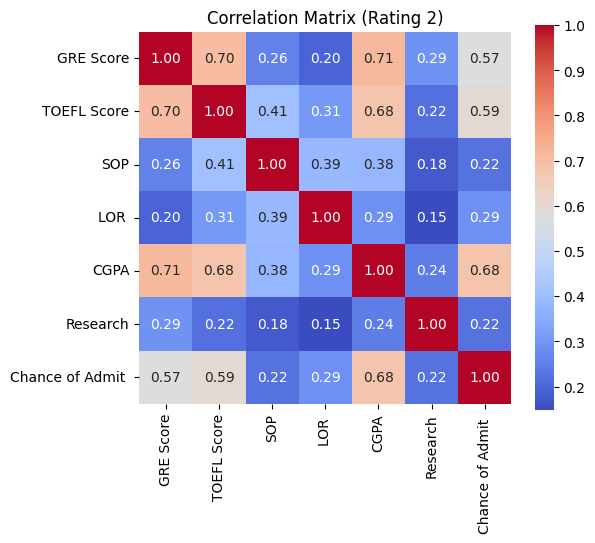

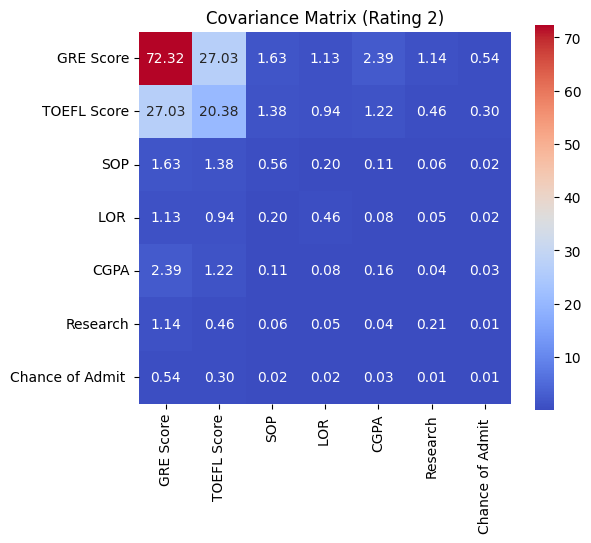

Mean of Rating 2:
GRE Score           309.180115
TOEFL Score         103.515612
SOP                   2.704841
LOR                   2.924779
CGPA                  8.183519
Research              0.297620
Chance of Admit       0.626027
dtype: float64
Covariance of Rating 2:
                  GRE Score  TOEFL Score       SOP      LOR           CGPA  \
GRE Score          0.062992    -0.001846  0.000216 -0.000253  7.267462e-05   
TOEFL Score       -0.001846     0.016823 -0.000071  0.000089  1.265952e-04   
SOP                0.000216    -0.000071  0.000433 -0.000010 -2.750157e-06   
LOR               -0.000253     0.000089 -0.000010  0.000360  6.289888e-06   
CGPA               0.000073     0.000127 -0.000003  0.000006  1.286404e-04   
Research           0.000072    -0.000159  0.000023 -0.000015 -3.999414e-07   
Chance of Admit    0.000049     0.000024 -0.000003  0.000002 -2.705749e-07   

                      Research  Chance of Admit   
GRE Score         7.215518e-05      4.881403e-05  

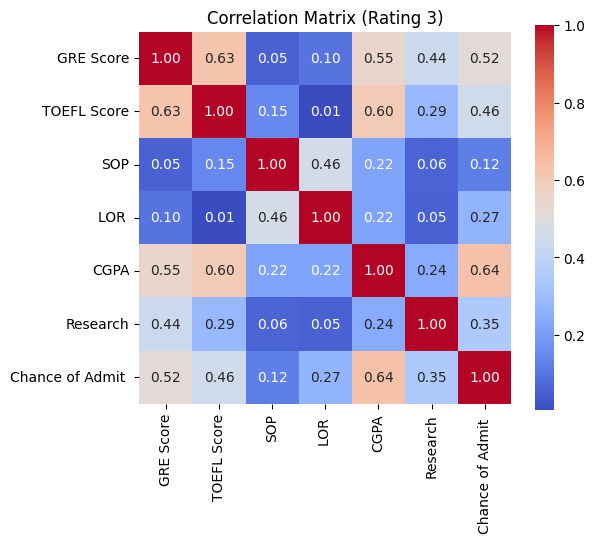

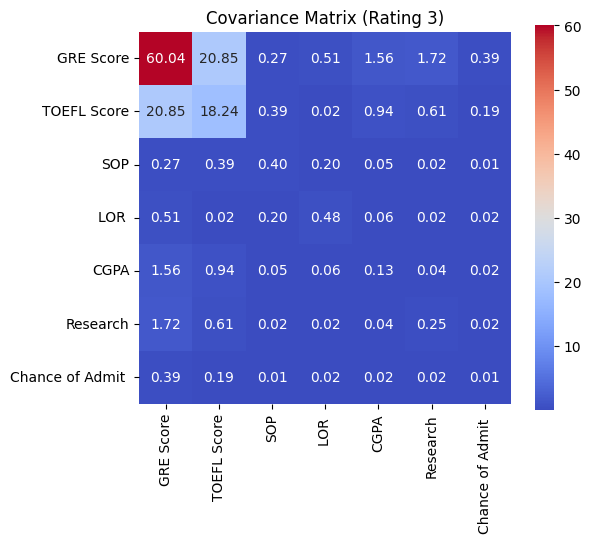

Mean of Rating 3:
GRE Score           315.933148
TOEFL Score         106.876619
SOP                   3.364603
LOR                   3.402032
CGPA                  8.551715
Research              0.533717
Chance of Admit       0.711919
dtype: float64
Covariance of Rating 3:
                  GRE Score  TOEFL Score           SOP      LOR       CGPA  \
GRE Score          0.046845    -0.000463  1.991186e-04  0.000019 -0.000152   
TOEFL Score       -0.000463     0.014288  1.879966e-04  0.000032 -0.000034   
SOP                0.000199     0.000188  3.437123e-04 -0.000027 -0.000007   
LOR                0.000019     0.000032 -2.667530e-05  0.000434 -0.000011   
CGPA              -0.000152    -0.000034 -6.596035e-06 -0.000011  0.000121   
Research          -0.000187     0.000046  1.364567e-05  0.000006 -0.000013   
Chance of Admit   -0.000024     0.000004 -4.986306e-07  0.000005  0.000001   

                  Research  Chance of Admit   
GRE Score        -0.000187     -2.388082e-05  
TOEFL S

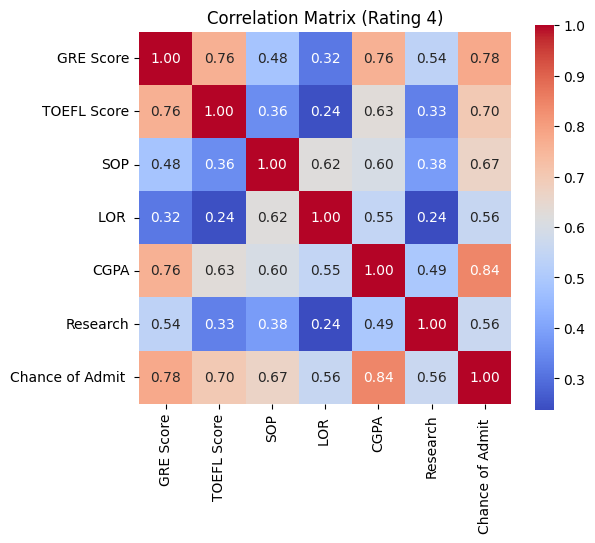

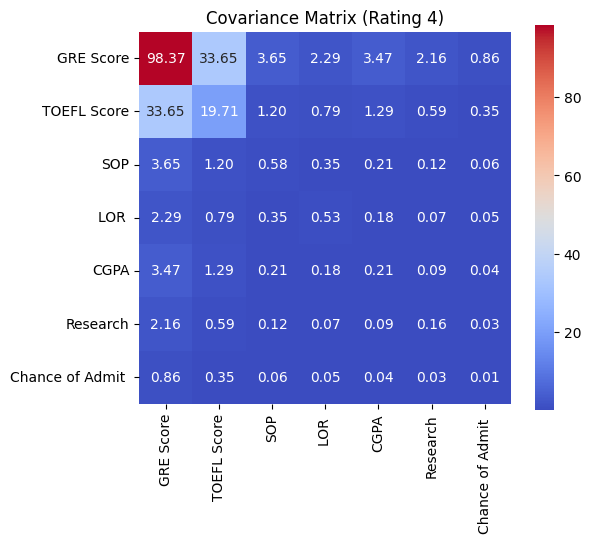

Mean of Rating 4:
GRE Score           324.823046
TOEFL Score         111.814229
SOP                   4.110380
LOR                   4.005959
CGPA                  9.022106
Research              0.796944
Chance of Admit       0.817942
dtype: float64
Covariance of Rating 4:
                  GRE Score  TOEFL Score           SOP          LOR   \
GRE Score          0.079399    -0.000977 -1.028647e-04 -1.216004e-04   
TOEFL Score       -0.000977     0.017568  1.155621e-04  1.064510e-04   
SOP               -0.000103     0.000116  4.791443e-04 -3.991118e-05   
LOR               -0.000122     0.000106 -3.991118e-05  4.248868e-04   
CGPA               0.000028     0.000013 -3.342022e-07 -7.069452e-06   
Research           0.000038    -0.000061  8.015455e-06 -8.784713e-07   
Chance of Admit    0.000013     0.000011  2.932414e-06 -3.753176e-06   

                          CGPA      Research  Chance of Admit   
GRE Score         2.779929e-05  3.803574e-05      1.316928e-05  
TOEFL Score       1

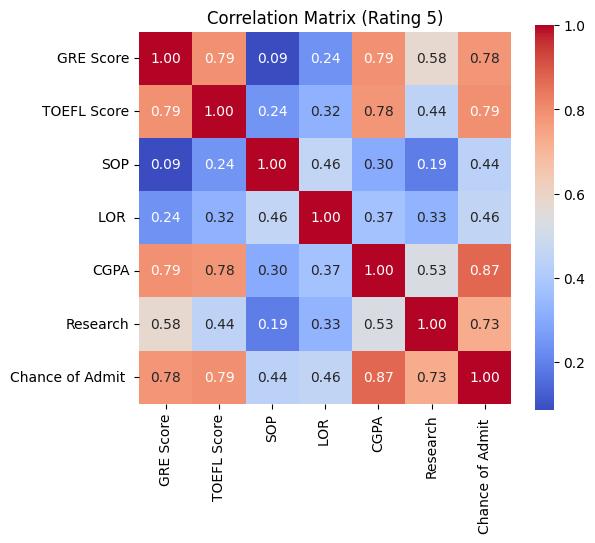

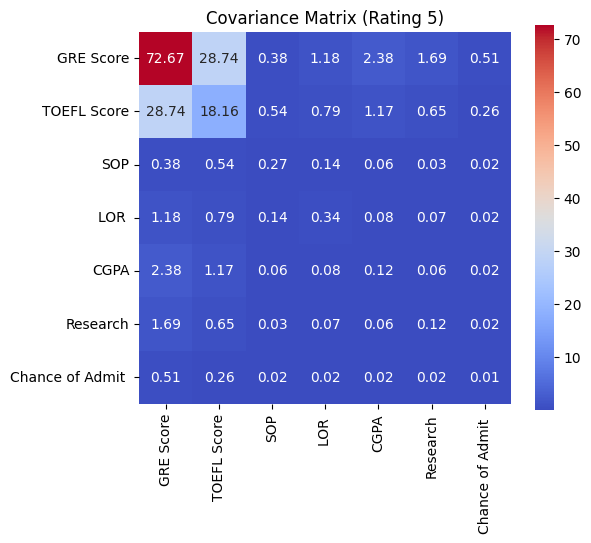

Mean of Rating 5:
GRE Score           328.344381
TOEFL Score         113.669193
SOP                   4.498518
LOR                   4.358425
CGPA                  9.290716
Research              0.865820
Chance of Admit       0.888251
dtype: float64
Covariance of Rating 5:
                  GRE Score  TOEFL Score       SOP          LOR       CGPA  \
GRE Score          0.062465     0.000112  0.000337  1.144073e-05 -0.000031   
TOEFL Score        0.000112     0.014919 -0.000013 -2.510753e-05 -0.000044   
SOP                0.000337    -0.000013  0.000217 -5.573824e-06  0.000007   
LOR                0.000011    -0.000025 -0.000006  3.040481e-04  0.000004   
CGPA              -0.000031    -0.000044  0.000007  4.304539e-06  0.000107   
Research          -0.000081     0.000005  0.000006  1.552607e-06 -0.000002   
Chance of Admit    0.000006     0.000005 -0.000002  6.139142e-07  0.000002   

                      Research  Chance of Admit   
GRE Score        -8.083459e-05      6.331888e-06  

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load student data from the CSV file (adjust the file path as needed)
file_path = 'Admission_Predict.csv'
df = pd.read_csv(file_path)

# Initialize empty variables to store each category
rating_1 = None
rating_2 = None
rating_3 = None
rating_4 = None
rating_5 = None

# Create categories based on unique university ratings
for rating in range(1, 6):
    category_data = df[df['University Rating'] == rating]
    if rating == 1:
        rating_1 = category_data
    elif rating == 2:
        rating_2 = category_data
    elif rating == 3:
        rating_3 = category_data
    elif rating == 4:
        rating_4 = category_data
    elif rating == 5:
        rating_5 = category_data

# Visualize the distribution of students in each category
category_counts = [len(category_data) for category_data in [rating_1, rating_2, rating_3, rating_4, rating_5]]

# Create a bar plot
plt.figure(figsize=(12, 8))
bar_plot = plt.bar([f'Rating {i}' for i in range(1, 6)], category_counts)
plt.title('Distribution of Students by University Rating', fontsize=16)
plt.ylabel('Number of Students', fontsize=14)

# Increase the font size for x-axis and y-axis labels
plt.xticks(fontsize=12, rotation=45, ha='right')
plt.yticks(fontsize=12)

# Add text labels on top of each bar
for bar in bar_plot:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

# Function to generate new data within tolerance
def generate_new_data(data, tolerance):
    mean = data.mean()
    std = data.std()
    new_data = pd.DataFrame()
    for _ in range(400):
        new_row = {}
        for col in data.columns:
            if col not in ['Serial No.', 'University Rating']:
                new_row[col] = np.random.uniform(mean[col] - tolerance * std[col], mean[col] + tolerance * std[col])
        new_data = pd.concat([new_data, pd.DataFrame(new_row, index=[0])], ignore_index=True)
    return new_data

# Calculate and visualize correlation matrices for each rating category
rating_categories = {'Rating 1': rating_1, 'Rating 2': rating_2, 'Rating 3': rating_3, 'Rating 4': rating_4, 'Rating 5': rating_5}

# Initialize dictionaries to store correlation matrices, covariance matrices, and means
correlation_matrices = {}
covariance_matrices = {}
means = {}

# Specify tolerance rate
tolerance = 0.05  # Adjust this value as needed

# Iterate through each rating category
for rating, data in rating_categories.items():
    # Dropping 'Serial No.' and 'University Rating' columns from data
    data = data.drop(columns=['Serial No.', 'University Rating'])
    # Calculate the correlation matrix
    correlation_matrix = data.corr()
    # Store the correlation matrix
    correlation_matrices[rating] = correlation_matrix
    # Calculate the covariance matrix
    covariance_matrix = data.cov()
    # Store the covariance matrix
    covariance_matrices[rating] = covariance_matrix
    # Calculate the mean
    mean = data.mean()
    # Store the mean
    means[rating] = mean

    # Generate new data with specified tolerance
    new_data = generate_new_data(data, tolerance)

    # Plot correlation matrix for new data
    plt.figure(figsize=(6, 5))
    sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
    plt.title(f'Correlation Matrix ({rating})')
    plt.show()

    # Plot covariance matrix for new data
    plt.figure(figsize=(6, 5))
    sns.heatmap(covariance_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
    plt.title(f'Covariance Matrix ({rating})')
    plt.show()

    # Print mean and covariance of new data
    print(f"Mean of {rating}:")
    print(new_data.mean())
    print(f"Covariance of {rating}:")
    print(new_data.cov())
    print()

# Store the correlation matrices, covariance matrices, and means for each category
# Now, you can access correlation_matrices['Rating 1'], covariance_matrices['Rating 1'], means['Rating 1'], etc.


In [ ]:
import pandas as pd
import numpy as np

# Load student data from the CSV file (adjust the file path as needed)
file_path = 'Admission_Predict.csv'
df = pd.read_csv(file_path)

# Initialize empty variables to store each category
rating_1 = None
rating_2 = None
rating_3 = None
rating_4 = None
rating_5 = None

# Create categories based on unique university ratings
for rating in range(1, 6):
    category_data = df[df['University Rating'] == rating]
    if rating == 1:
        rating_1 = category_data
    elif rating == 2:
        rating_2 = category_data
    elif rating == 3:
        rating_3 = category_data
    elif rating == 4:
        rating_4 = category_data
    elif rating == 5:
        rating_5 = category_data

# Function to generate new data within tolerance while maintaining correlation and mean
def generate_new_data(data, tolerance):
    # Calculate the correlation matrix and mean
    correlation_matrix = data.corr()
    mean = data.mean()
    # Generate new data with specified tolerance
    new_data = pd.DataFrame()
    for _ in range(400):
        new_row = {}
        for col in data.columns:
            if col not in ['Serial No.', 'University Rating']:
                # Generate a new value within the tolerance range
                new_value = np.random.uniform(mean[col] - tolerance, mean[col] + tolerance)
                # Adjust the value to maintain correlation with other columns
                adjustment = correlation_matrix[col].mul(new_value - mean[col])
                new_value += adjustment.sum()
                new_row[col] = new_value
        new_data = new_data.append(new_row, ignore_index=True)
    return new_data

# Calculate new data for each rating category
new_rating_1 = generate_new_data(rating_1.drop(columns=['Serial No.', 'University Rating']), tolerance=0.05)
new_rating_2 = generate_new_data(rating_2.drop(columns=['Serial No.', 'University Rating']), tolerance=0.05)
new_rating_3 = generate_new_data(rating_3.drop(columns=['Serial No.', 'University Rating']), tolerance=0.05)
new_rating_4 = generate_new_data(rating_4.drop(columns=['Serial No.', 'University Rating']), tolerance=0.05)
new_rating_5 = generate_new_data(rating_5.drop(columns=['Serial No.', 'University Rating']), tolerance=0.05)

# Now you have new data for each rating category while maintaining correlation and mean
# You can store or use this new data as needed


AttributeError: 'DataFrame' object has no attribute 'append'

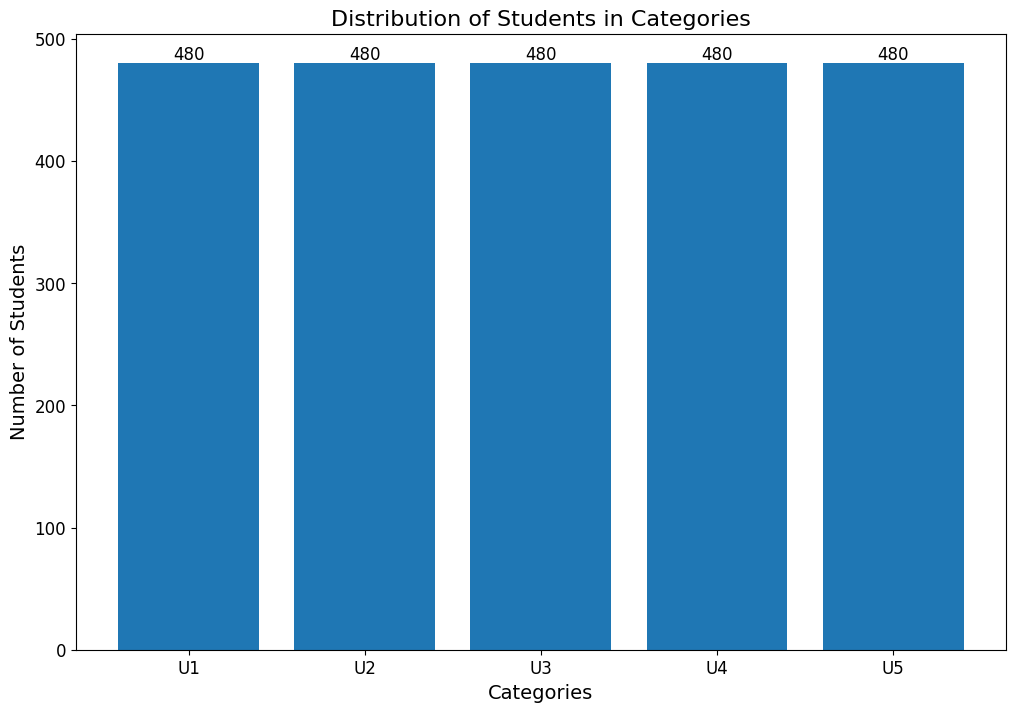

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load student data from the CSV file (adjust the file path as needed)
file_path = 'new_data.csv'
df = pd.read_csv(file_path)

# Sort the data by a relevant feature (e.g., University Rating)
df = df.sort_values(by='University Rating')

# Calculate the number of students in each category
category_size = 480

# Initialize an empty dictionary to store the categories
categories = {}

# Split the data into five equal-sized categories
for i in range(5):
    start_index = i * category_size
    end_index = (i + 1) * category_size
    category_name = f'U{i + 1}'
    category_data = df.iloc[start_index:end_index]
    categories[category_name] = category_data

# Visualize the distribution of students in each category
category_counts = [len(categories[category_name]) for category_name in categories]

# Create a bar plot with increased text size
plt.figure(figsize=(12, 8))
bar_plot = plt.bar(categories.keys(), category_counts)
plt.title('Distribution of Students in Categories', fontsize=16)
plt.xlabel('Categories', fontsize=14)
plt.ylabel('Number of Students', fontsize=14)

# Increase the font size for x-axis and y-axis labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Increase the font size for bar labels
for bar in bar_plot:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom', fontsize=12)

plt.show()

# Now, 'categories' is a dictionary where each key represents a category (U1, U2, U3, U4, U5),
# and the corresponding value is a DataFrame containing 480 students from that category.

# You can perform further analysis or operations on each category as needed.

# For runtime use, you can save these DataFrames to a data structure or file.


The above code does the following:

1. Sets the font size for various elements in the plot, such as X-axis labels, Y-axis labels, axis titles, and figure titles.

2. Loads a dataset from a CSV file ('custom_data_correlated.csv').

3. Defines cutoffs for University Rating categories based on the dataset.

4. Creates a new column 'University Rating Category' in the DataFrame based on the cutoffs.

5. Defines a list of features to consider for analysis.

6. Initializes a dictionary to store the most related feature for each category.

7. Sets up subplots for different subgroups (maximum 3 per row) and adjusts spacing between them.

8. Sets the font size for annotations within the correlation heatmaps.

9. Iterates through each University Rating category, selects the data for the category, calculates correlations within that category, and finds the most related feature to "Chance of Admit."

10. Creates a heatmap for visualization with annotations, where the font size for annotations is increased.

11. Displays the subplots, and prints the most related features for each category.

This code generates correlation heatmaps for different University Rating categories and highlights the most related feature to "Chance of Admit" for each category. It also customizes font sizes to improve readability in the plots.

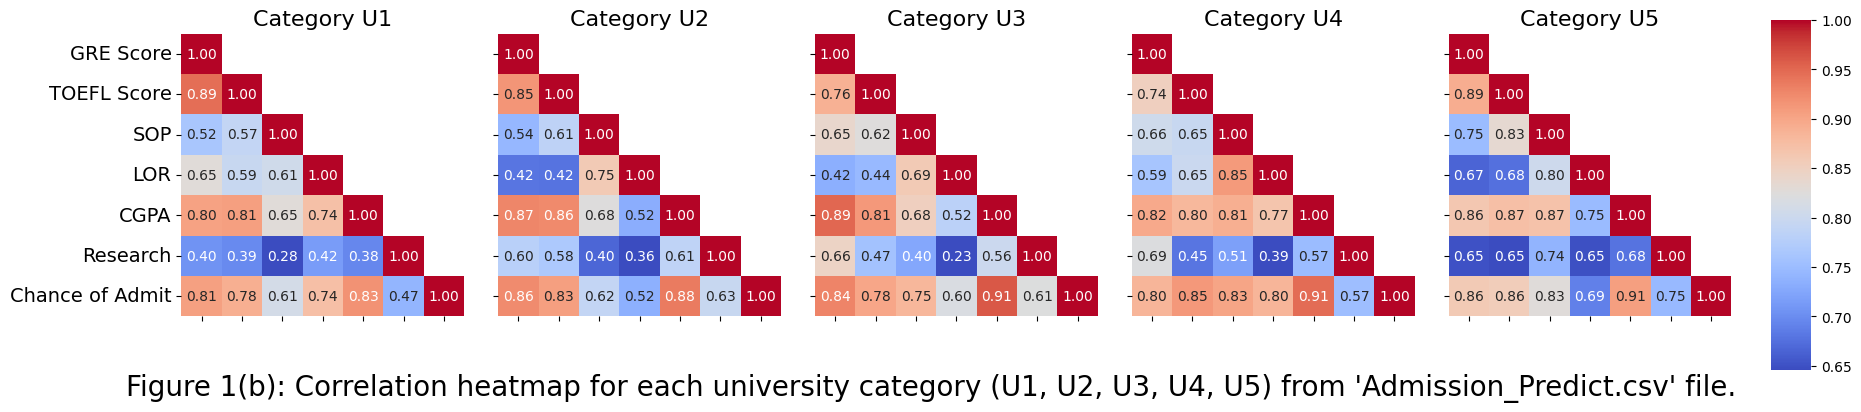

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load student data from the CSV file (adjust the file path as needed)
file_path = 'Admission_Predict.csv'
df = pd.read_csv(file_path)

# Drop the 'Serial No.' and 'University Rating' columns
df = df.drop(columns=['Serial No.', 'University Rating'])

# Specify the number of students in each category
category_student_counts = [100, 90, 80, 60, 70]

# Initialize an empty dictionary to store the categories
categories = {}

# Split the data into categories with specified student counts
start_index = 0
for i, count in enumerate(category_student_counts):
    end_index = start_index + count
    category_name = f'U{i + 1}'
    category_data = df.iloc[start_index:end_index]
    categories[category_name] = category_data
    start_index = end_index

# Define the features to include in the lower triangle
features = ['GRE Score', 'TOEFL Score', 'SOP', 'LOR', 'CGPA', 'Research', 'Chance of Admit']

# Create subplots
fig, axes = plt.subplots(1, 5, figsize=(20, 5))  # Five side-by-side plots with the same size
fig.subplots_adjust(wspace=0.12, bottom=0.2)  # Adjust spacing between plots and move the color bar to the bottom

# Initialize variables to store correlation matrices
M1, M2, M3, M4, M5 = None, None, None, None, None

# Iterate through each university category and create a heatmap
for i, category in enumerate(categories.keys()):
    # Get the data for the current category
    category_data = categories[category]

    # Calculate the correlation matrix for the current category
    correlation_matrix = category_data.corr()

    # Store the correlation matrix based on the category index
    if i == 0:
        M1 = correlation_matrix
    elif i == 1:
        M2 = correlation_matrix
    elif i == 2:
        M3 = correlation_matrix
    elif i == 3:
        M4 = correlation_matrix
    elif i == 4:
        M5 = correlation_matrix

    # Create a heatmap with 'GRE Score' and 'Chance of Admit' in the lower triangle
    mask = np.triu(np.ones_like(correlation_matrix), k=1)  # Exclude the diagonal
    sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', mask=mask, ax=axes[i], square=True,
                cbar=i == 4, cbar_ax=None if i < 4 else fig.add_axes([0.92, 0.15, 0.02, 0.7]))  # Move color bar to bottom

    # Set axis labels
    if i == 0:
        axes[i].set_xticklabels([])  # Remove X-axis labels
        axes[i].set_yticklabels(features, fontsize=14)
    else:
        axes[i].set_xticklabels([])
        axes[i].set_yticklabels([])

    # Set title for each subplot
    axes[i].set_title(f'Category {category}', fontsize=16)

# Rotate color bar ticks to be horizontal
plt.setp(axes[4].collections[0].colorbar.ax.get_yticklabels(), rotation=0)

# Add caption
caption = "Figure 1(b): Correlation heatmap for each university category (U1, U2, U3, U4, U5) from 'Admission_Predict.csv' file."
plt.figtext(0.5, 0.1, caption, fontsize=20, ha='center')

plt.show()

# Now, you can use M1, M2, M3, M4, M5 in your next part of the code


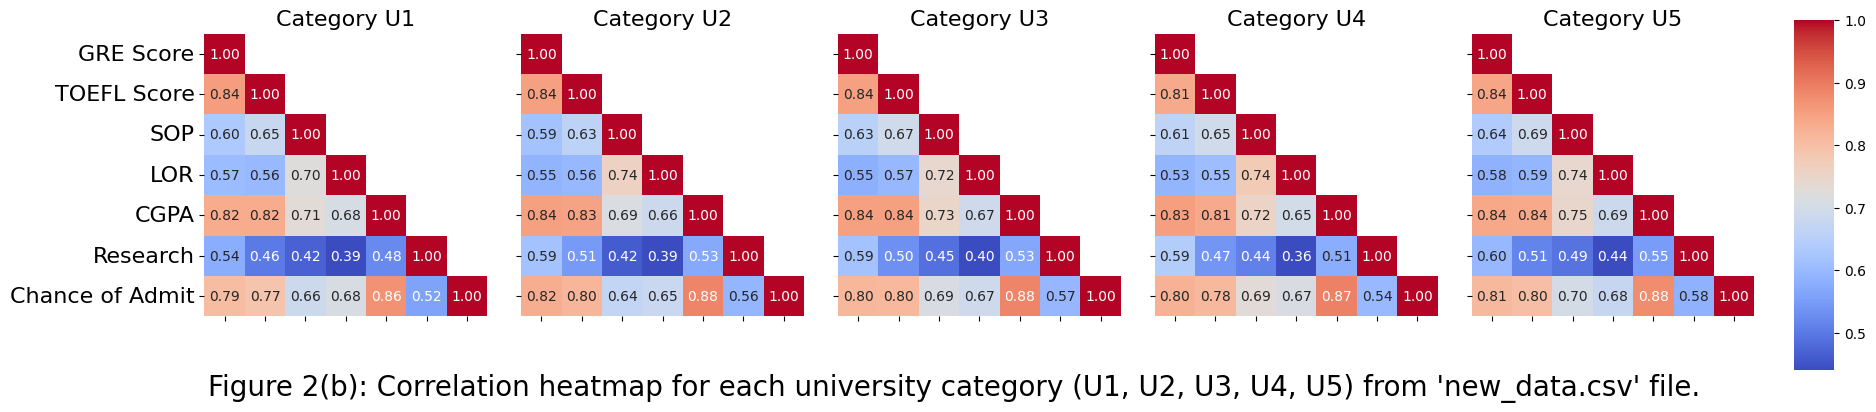

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load student data from the CSV file (adjust the file path as needed)
file_path = 'new_data.csv'
df = pd.read_csv(file_path)

# Drop the 'Serial No.' and 'University Rating' columns
df = df.drop(columns=['Serial No.', 'University Rating'])

# Determine the number of students in each category
category_size = 480

# Initialize an empty dictionary to store the categories
categories = {}

# Split the data into five equal-sized categories
for i in range(5):
    start_index = i * category_size
    end_index = (i + 1) * category_size
    category_name = f'U{i + 1}'
    category_data = df.iloc[start_index:end_index]
    categories[category_name] = category_data

# Define the features to include in the lower triangle
features = ['GRE Score', 'TOEFL Score', 'SOP', 'LOR', 'CGPA', 'Research', 'Chance of Admit']

# Create subplots
fig, axes = plt.subplots(1, 5, figsize=(20, 5))  # Five side-by-side plots with the same size
fig.subplots_adjust(wspace=0.12, bottom=0.2)  # Adjust spacing between plots and move the color bar to the bottom

# Customize font size and the number of digits after the decimal point
annot_font_size = 20
axis_label_font_size = 16

fmt = '.2f'

# Define the correlation matrices obtained from the first part
M1, M2, M3, M4, M5 = None, None, None, None, None

# Iterate through each university category and create a heatmap
for i, category in enumerate(categories.keys()):
    # Get the data for the current category
    category_data = categories[category]

    # Calculate the correlation matrix for the current category
    correlation_matrix = category_data.corr()

    # Store the correlation matrix based on the category index
    if i == 0:
        M1 = correlation_matrix
    elif i == 1:
        M2 = correlation_matrix
    elif i == 2:
        M3 = correlation_matrix
    elif i == 3:
        M4 = correlation_matrix
    elif i == 4:
        M5 = correlation_matrix

    # Create a heatmap with 'GRE Score' and 'Chance of Admit' in the lower triangle
    mask = np.triu(np.ones_like(correlation_matrix), k=1)  # Exclude the diagonal
    sns.heatmap(correlation_matrix, annot=True, fmt=fmt, cmap='coolwarm', mask=mask, ax=axes[i], square=True,
                cbar=i == 4, cbar_ax=None if i < 4 else fig.add_axes([0.92, 0.15, 0.02, 0.7]))  # Move color bar to bottom

    # Set axis labels
    if i == 0:
        axes[i].set_xticklabels([])  # Remove X-axis labels
        axes[i].set_yticklabels(features, fontsize=axis_label_font_size)
    else:
        axes[i].set_xticklabels([])
        axes[i].set_yticklabels([])

    # Set title for each subplot
    axes[i].set_title(f'Category {category}', fontsize=axis_label_font_size)

# Rotate color bar ticks to be horizontal
plt.setp(axes[4].collections[0].colorbar.ax.get_yticklabels(), rotation=0)

# Add caption
caption = "Figure 2(b): Correlation heatmap for each university category (U1, U2, U3, U4, U5) from 'new_data.csv' file."
plt.figtext(0.5, 0.1, caption, fontsize=20, ha='center')

plt.show()

# Now you can use the correlation matrices M1, M2, M3, M4, M5 as needed in your code below this point
# For example, you can perform further analysis, visualization, or modeling using these matrices.


This code generates a set of three plots for different machine learning models and their performance in predicting "Chance of Admit" based on "University Rating" categories. Here are the key points and results:

1. **Visualization:** It creates subplots for three machine learning models: Linear Regression, Decision Tree Regression, and Random Forest Regression.

2. **Color-Coded Categories:** The points in the plots are color-coded for five university rating categories (U1, U2, U3, U4, U5) using different colors (red, green, blue, yellow, cyan).

3. **Data Iteration:** The code iterates through the selected machine learning models and the university rating categories.

4. **Model Predictions:** For each model and category, it uses trained machine learning models to predict "Chance of Admit" based on the most relevant feature for that category.

5. **Scatter Plots:** Scatter plots are created for each model, showing the relationship between actual and predicted "Chance of Admit" for each category.

6. **Reference Line:** A reference line at a 45-degree angle (y = x) is added to indicate perfect predictions.

7. **Axes and Legends:** Axes labels, legends, and titles are included to make the plots informative.

8. **Layout:** The subplots are organized in a tight layout within a single figure.

9. **Final Display:** The code displays the generated plots, allowing easy visual comparison of model performance for different university rating categories.

Overall, this code helps analyze and visualize how well the selected machine learning models perform in predicting admission chances across various university rating categories, providing insights into their predictive capabilities.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.metrics import mean_squared_error

# Load student data from the CSV file (adjust the file path as needed)
file_path = 'new_data.csv'
df = pd.read_csv(file_path)

# Determine the number of students in each category
category_size = 480

# Initialize an empty dictionary to store the categories
categories = {}

# Split the data into five equal-sized categories
for i in range(5):
    start_index = i * category_size
    end_index = (i + 1) * category_size
    category_name = f'U{i + 1}'
    category_data = df.iloc[start_index:end_index]
    categories[category_name] = category_data

# Initialize the regression models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Extra Trees': ExtraTreesRegressor()
}

# Initialize a dictionary to store the model performance for each category
category_model_scores = {category: {} for category in categories.keys()}

# Initialize a common y-axis scale
max_mse = 0.0

# Iterate through each category and evaluate the models
for category_name, category_data in categories.items():
    # Define the features and target variable
    features = ['GRE Score', 'TOEFL Score', 'SOP', 'LOR ', 'CGPA', 'Research']
    target = 'Chance of Admit '

    # Split the data into features and target
    X = category_data[features]
    y = category_data[target]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train and evaluate each model
    model_scores = {}

    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        model_scores[model_name] = mse

        if mse > max_mse:
            max_mse = mse

    # Store the model performance for this category
    category_model_scores[category_name] = model_scores

# Create DataFrame to display model performance
df_model_performance = pd.DataFrame(category_model_scores).T

# Display the DataFrame
print(df_model_performance)

# Update the title
title = """Figure 4(a): Mean Squared Error (MSE) Values for Each Machine Learning Algorithm
Across University Categories (U1, U2, U3, U4, U5).\n
Figure 4(b): R-squared Values for Each Machine Learning Algorithm
Across University Categories (U1, U2, U3, U4, U5)."""
print(title)



    Linear Regression  Decision Tree  Random Forest  Extra Trees
U1           0.005689       0.005344       0.003580     0.003295
U2           0.003153       0.008419       0.002341     0.002215
U3           0.005416       0.007204       0.005600     0.005520
U4           0.002194       0.006282       0.002189     0.002183
U5           0.003969       0.007343       0.004072     0.004187
Figure 4(a): Mean Squared Error (MSE) Values for Each Machine Learning Algorithm 
Across University Categories (U1, U2, U3, U4, U5).

Figure 4(b): R-squared Values for Each Machine Learning Algorithm 
Across University Categories (U1, U2, U3, U4, U5).


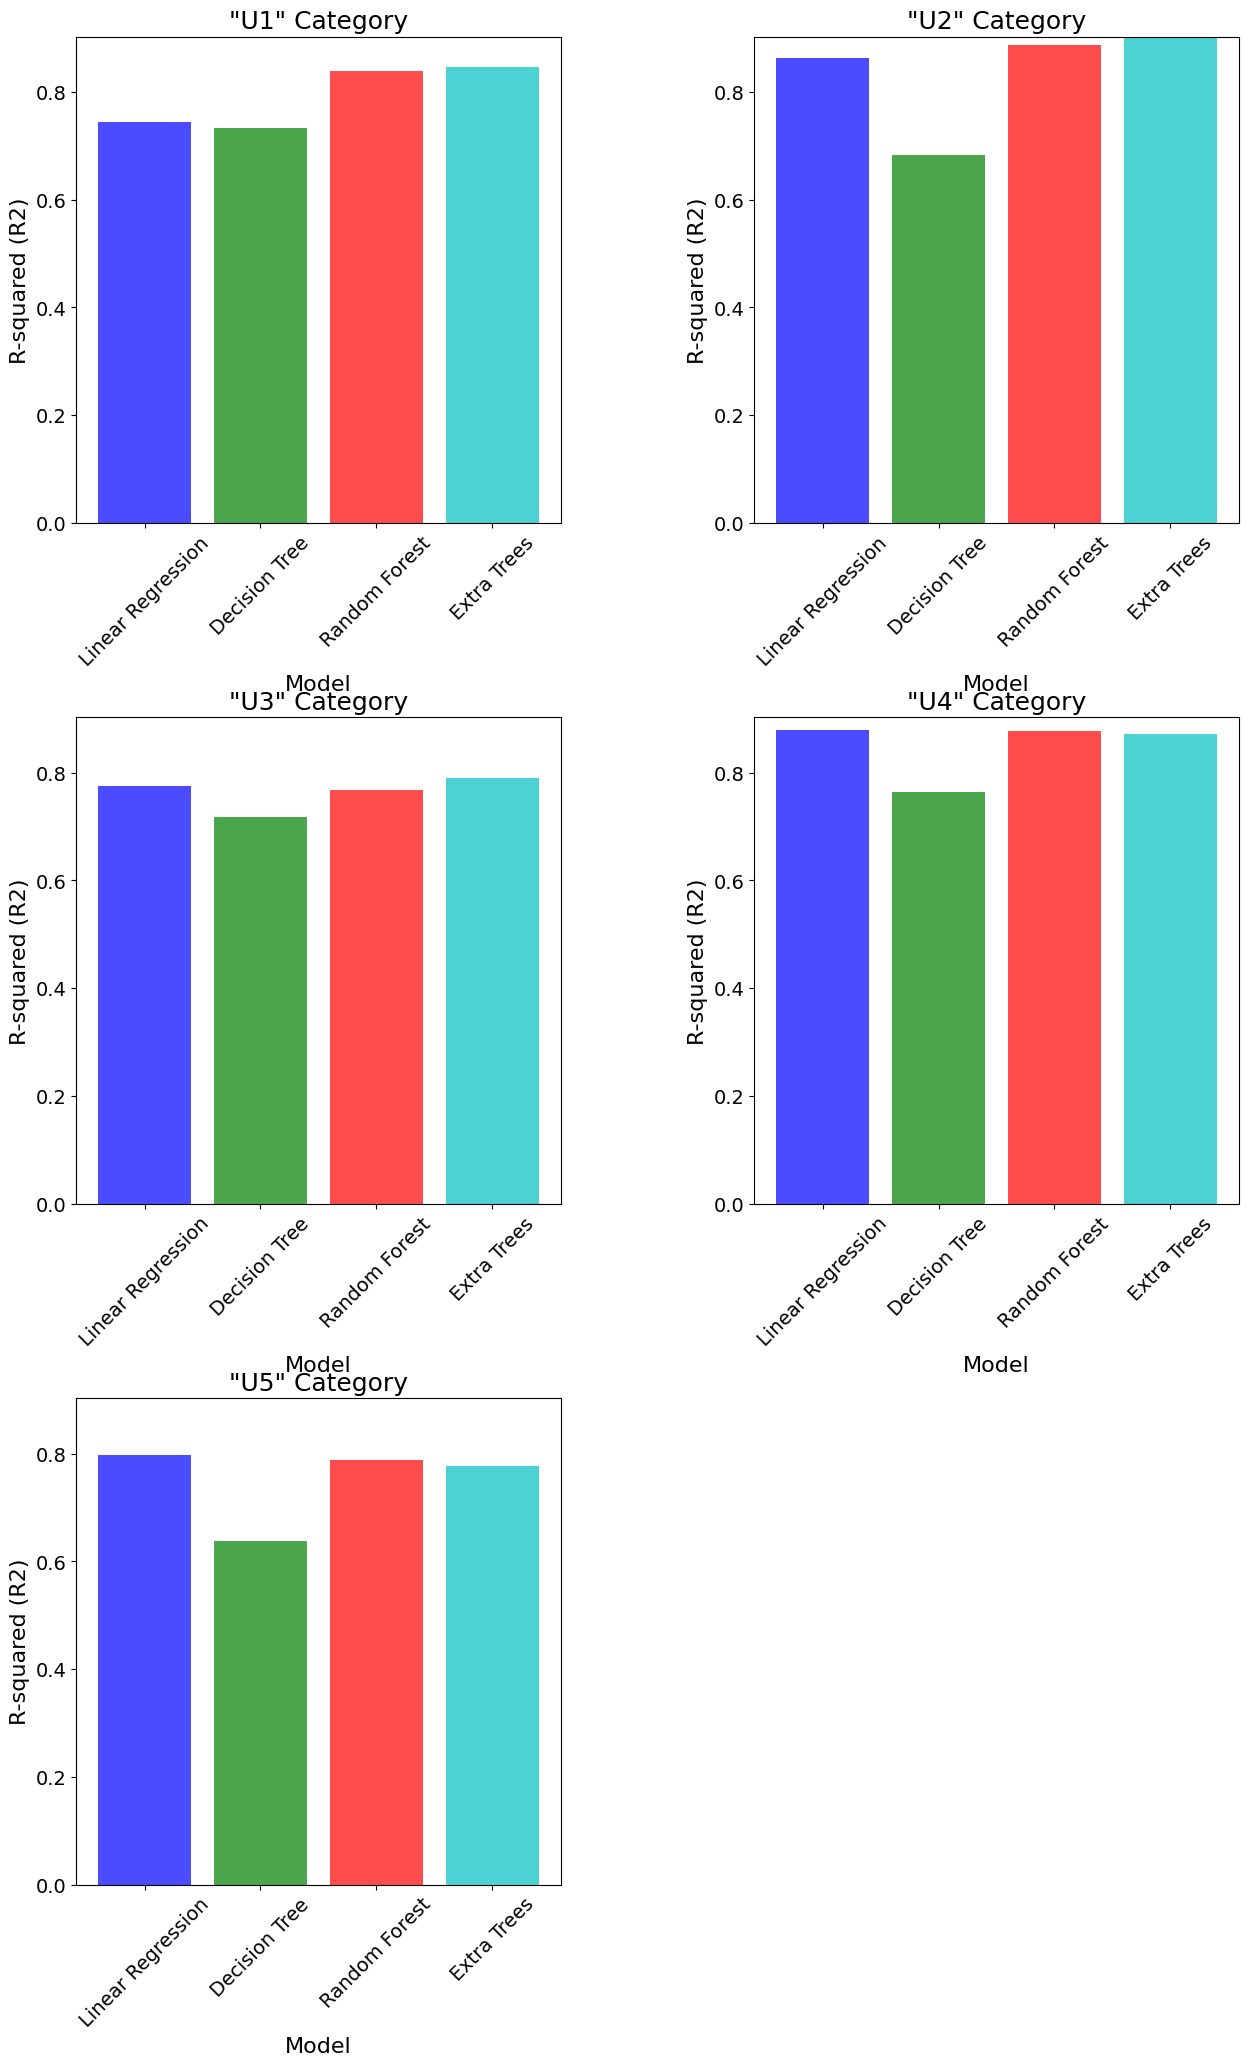

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.metrics import r2_score

# Load student data from the CSV file (adjust the file path as needed)
file_path = 'new_data.csv'
df = pd.read_csv(file_path)

# Determine the number of students in each category
category_size = 480

# Initialize an empty dictionary to store the categories
categories = {}

# Split the data into five equal-sized categories
for i in range(5):
    start_index = i * category_size
    end_index = (i + 1) * category_size
    category_name = f'U{i + 1}'
    category_data = df.iloc[start_index:end_index]
    categories[category_name] = category_data

# Initialize the regression models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Extra Trees': ExtraTreesRegressor()
}

# Initialize a dictionary to store the model performance for each category
category_model_scores = {category: {} for category in categories.keys()}

# Initialize a common y-axis scale
max_r2 = 0.0

# Iterate through each category and evaluate the models
for category_name, category_data in categories.items():
    # Define the features and target variable
    features = ['GRE Score', 'TOEFL Score', 'SOP', 'LOR ', 'CGPA', 'Research']
    target = 'Chance of Admit '

    # Split the data into features and target
    X = category_data[features]
    y = category_data[target]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train and evaluate each model
    model_scores = {}

    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        model_scores[model_name] = r2

        if r2 > max_r2:
            max_r2 = r2

    # Store the model performance for this category
    category_model_scores[category_name] = model_scores

# Define the colors for each model
colors = ['b', 'g', 'r', 'c']

# Create subplots with a common y-axis scale
num_categories = len(categories)
num_models = len(models)
plots_per_row = 2  # Number of plots per row
num_rows = (num_categories - 1) // plots_per_row + 1

fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(15, 8 * num_rows))
fig.subplots_adjust(wspace=0.4, hspace=0.4)

# Customize font size for axis labels and tick labels
axis_label_font_size = 16  # Font size for axis labels
tick_label_font_size = 14  # Font size for tick labels
title_font_size = 18  # Font size for titles

for i, (category_name, model_scores) in enumerate(category_model_scores.items()):
    row = i // plots_per_row
    col = i % plots_per_row
    ax = axes[row, col]

    model_names = list(model_scores.keys())
    r2_values = list(model_scores.values())

    ax.bar(model_names, r2_values, color=colors, alpha=0.7)
    ax.set_title(f'"{category_name}" Category', fontsize=title_font_size)
    ax.set_xlabel('Model', fontsize=axis_label_font_size)
    ax.set_ylabel('R-squared (R2)', fontsize=axis_label_font_size)
    ax.set_ylim(0, max_r2)  # Common y-axis scale

    # Customize font size for tick labels and rotate them
    ax.tick_params(axis='x', labelsize=tick_label_font_size, rotation=45)
    ax.tick_params(axis='y', labelsize=tick_label_font_size)

# Hide any empty subplots
for i in range(num_categories, num_rows * plots_per_row):
    row = i // plots_per_row
    col = i % plots_per_row
    fig.delaxes(axes[row, col])

plt.show()


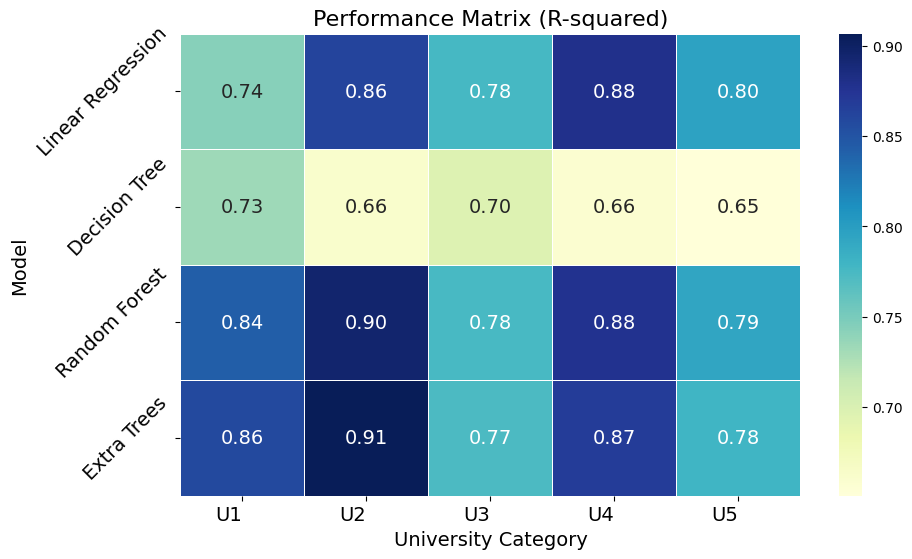

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.metrics import r2_score

# Load student data from the CSV file (adjust the file path as needed)
file_path = 'new_data.csv'
df = pd.read_csv(file_path)

# Determine the number of students in each category
category_size = 480

# Initialize an empty dictionary to store the categories
categories = {}

# Split the data into five equal-sized categories
for i in range(5):
    start_index = i * category_size
    end_index = (i + 1) * category_size
    category_name = f'U{i + 1}'
    category_data = df.iloc[start_index:end_index]
    categories[category_name] = category_data

# Initialize the regression models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Extra Trees': ExtraTreesRegressor()
}

# Initialize a dictionary to store the model performance for each category
category_model_scores = {category: {} for category in categories.keys()}

# Initialize a common y-axis scale
max_r2 = 0.0

# Iterate through each category and evaluate the models
for category_name, category_data in categories.items():
    # Define the features and target variable
    features = ['GRE Score', 'TOEFL Score', 'SOP', 'LOR ', 'CGPA', 'Research']
    target = 'Chance of Admit '

    # Split the data into features and target
    X = category_data[features]
    y = category_data[target]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train and evaluate each model
    model_scores = {}

    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        model_scores[model_name] = r2

        if r2 > max_r2:
            max_r2 = r2

    # Store the model performance for this category
    category_model_scores[category_name] = model_scores

# Create a DataFrame for the performance matrix
performance_data = pd.DataFrame(category_model_scores)

# Set the figure size for the heatmap
plt.figure(figsize=(10, 6))

# Create a heatmap using Seaborn with University Category on the x-axis
heatmap = sns.heatmap(performance_data, annot=True, fmt=".2f", cmap="YlGnBu", cbar=True, linewidths=0.5, annot_kws={"size": 14})

# Customize the plot
plt.title("Performance Matrix (R-squared)", fontsize=16)
plt.xlabel("University Category", fontsize=14)
plt.ylabel("Model", fontsize=14)

# Increase the font size for x-axis labels
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=0, fontsize=14, ha='right')

# Increase the font size for y-axis labels
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=45, fontsize=14)

# Display the plot
plt.show()


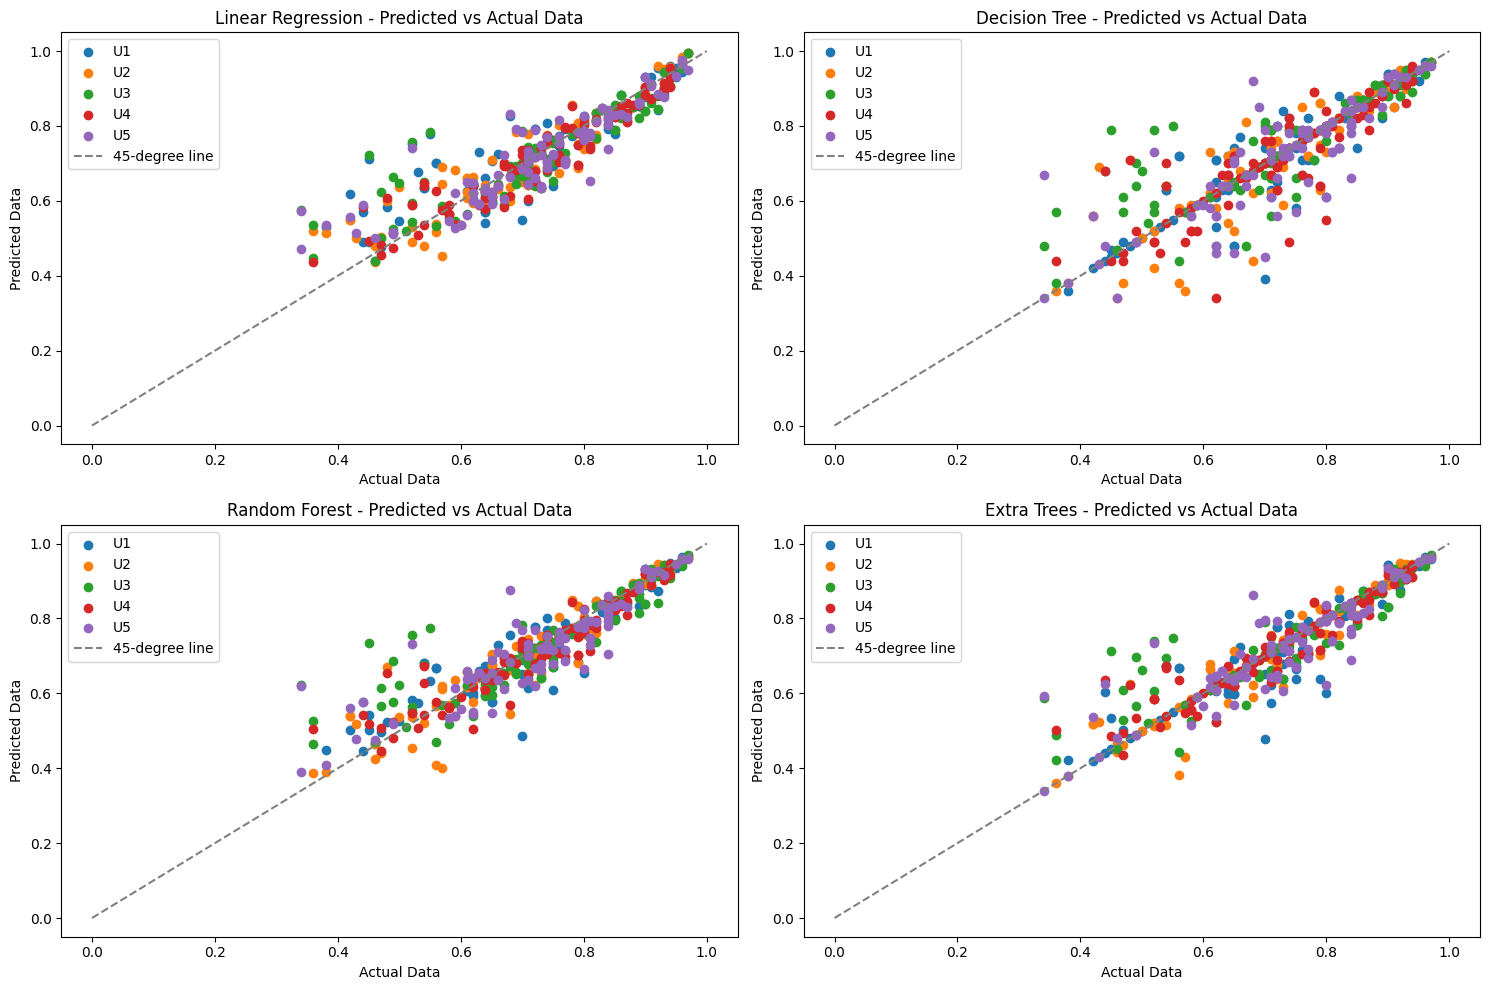

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor

# Load student data from the CSV file (adjust the file path as needed)
file_path = 'new_data.csv'
df = pd.read_csv(file_path)

# Determine the number of students in each category
category_size = 480

# Initialize an empty dictionary to store the categories
categories = {}

# Split the data into five equal-sized categories
for i in range(5):
    start_index = i * category_size
    end_index = (i + 1) * category_size
    category_name = f'U{i + 1}'
    category_data = df.iloc[start_index:end_index]
    categories[category_name] = category_data

# Initialize the regression models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Extra Trees': ExtraTreesRegressor()
}

# Create subplots with a 2x2 layout
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.subplots_adjust(wspace=0.3, hspace=0.3)

# Iterate through each model and plot Predicted vs Actual for each category
for (model_name, model), ax in zip(models.items(), axes.flatten()):
    # Iterate through each category
    for category_name, category_data in categories.items():
        # Define the features and target variable
        features = ['GRE Score', 'TOEFL Score', 'SOP', 'LOR ', 'CGPA', 'Research']
        target = 'Chance of Admit '

        # Split the data into features and target
        X = category_data[features]
        y = category_data[target]

        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Train the model
        model.fit(X_train, y_train)

        # Predict on the test set
        y_pred = model.predict(X_test)

        # Scatter plot of Predicted vs Actual data
        ax.scatter(y_test, y_pred, label=category_name)

    # Plot the 45-degree line
    ax.plot([0, 1], [0, 1], '--', color='gray', label='45-degree line')

    # Set plot labels and title
    ax.set_xlabel('Actual Data')
    ax.set_ylabel('Predicted Data')
    ax.set_title(f'{model_name} - Predicted vs Actual Data')
    ax.legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()
